In [62]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [63]:
df=pd.read_csv('customer.csv')
df.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


In [64]:
df.shape

(200, 5)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cust_Number       200 non-null    object
 1   Yearly_Income     200 non-null    int64 
 2   Age               200 non-null    int64 
 3   Cust_Spend_Score  200 non-null    int64 
 4   Sex               200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [66]:
df.describe()

,Yearly_Income,Age,Cust_Spend_Score,Sex
count,200.000000,200.000000,200.000000,200.000000
mean,60560.000000,39.095000,51.380000,0.560000
std,26264.721165,14.088592,26.034488,0.497633
min,15000.000000,17.000000,1.000000,0.000000
25%,41500.000000,28.000000,33.750000,0.000000
50%,61500.000000,36.000000,51.000000,1.000000
75%,78000.000000,49.250000,72.000000,1.000000
max,137000.000000,73.000000,103.000000,1.000000


In [67]:
from pylab import rcParams

In [68]:
rcParams['figure.figsize']=8,6

In [69]:
%matplotlib inline

In [70]:
df=df.drop('Cust_Number',axis=1)

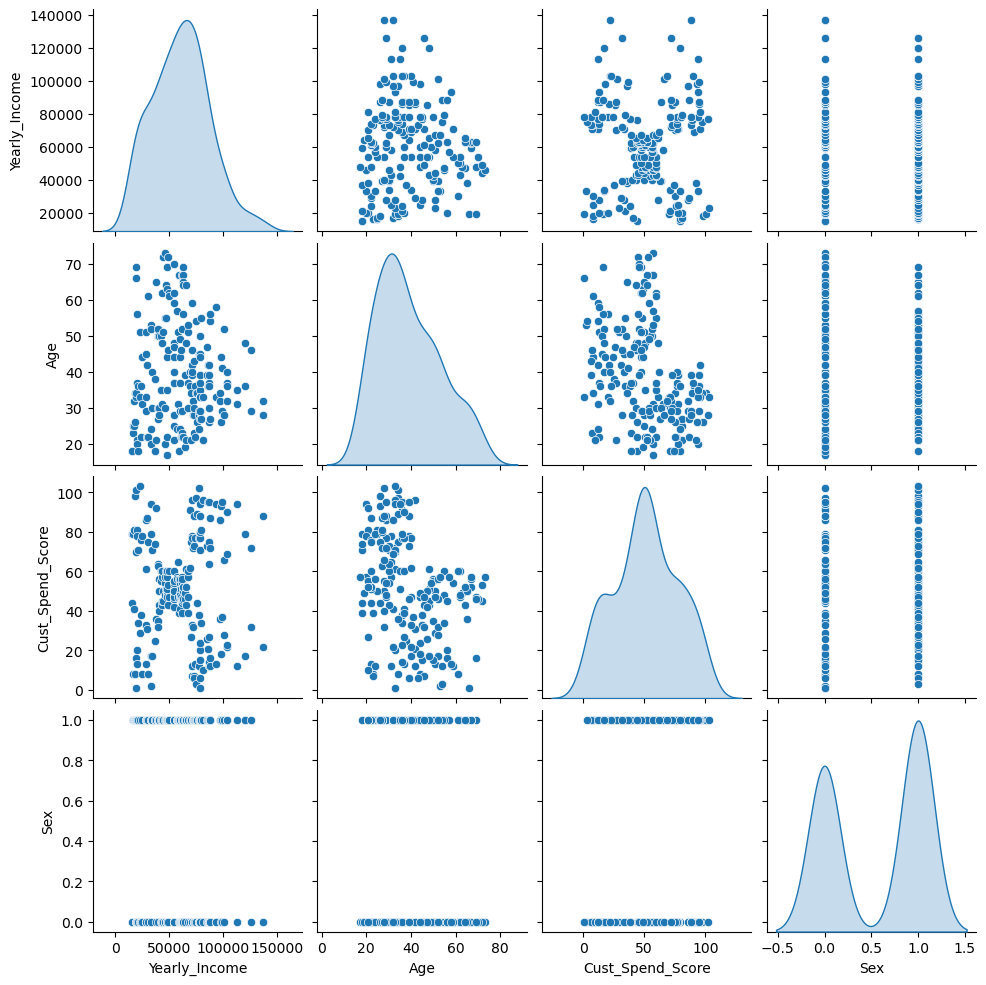

In [71]:
sns.pairplot(df,diag_kind='kde')
plt.show()

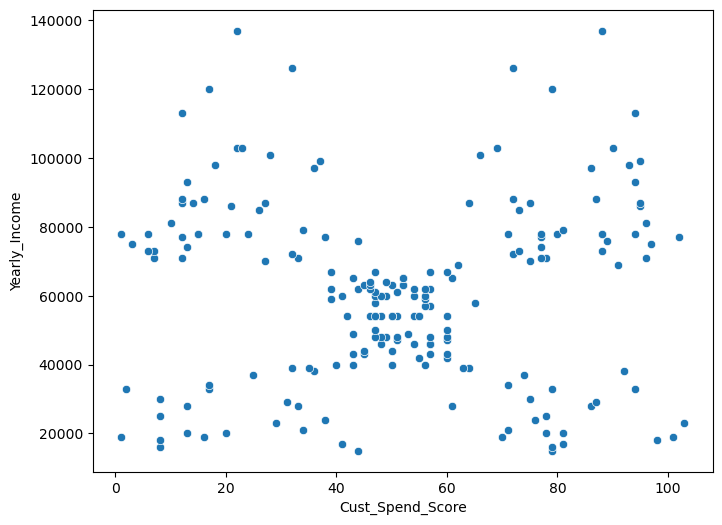

In [72]:
sns.scatterplot(x='Cust_Spend_Score',y='Yearly_Income', data=df)
plt.show()

<AxesSubplot:>

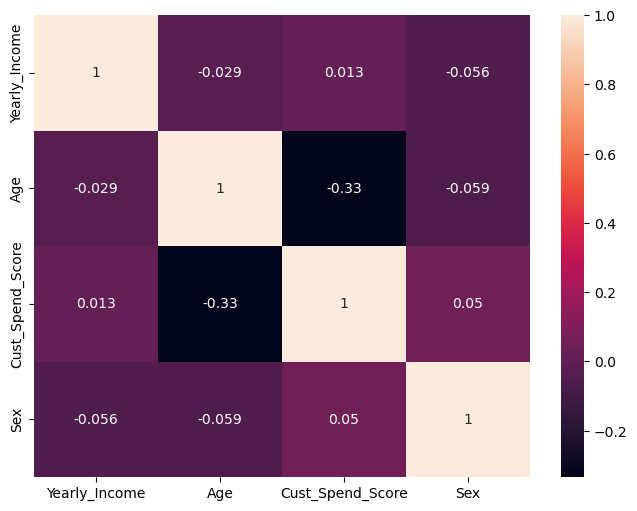

In [73]:
sns.heatmap(df.corr(),annot=True)

In [74]:
# step no.1 i will shaw the scatter plot k=5 may work 

In [75]:
df_flt=df[['Yearly_Income','Cust_Spend_Score']]

In [76]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [77]:
df_scale=sc.fit_transform(df_flt)

In [78]:
df_scale

array([[-1.73899919, -0.28418148],
       [-1.73899919,  1.06356268],
       [-1.70082976, -1.67043263],
       [-1.70082976,  1.06356268],
       [-1.66266033, -0.39970241],
       [-1.66266033,  1.14057663],
       [-1.62449091, -1.67043263],
       [-1.62449091,  1.79519523],
       [-1.58632148, -1.93998146],
       [-1.58632148,  0.7169999 ],
       [-1.58632148, -1.36237682],
       [-1.58632148,  1.91071616],
       [-1.54815205, -1.20834891],
       [-1.54815205,  1.14057663],
       [-1.54815205, -1.47789774],
       [-1.54815205,  1.02505571],
       [-1.50998262, -0.66925125],
       [-1.50998262,  0.75550687],
       [-1.43364376, -0.86178613],
       [-1.43364376,  1.98773011],
       [-1.39547433, -0.51522334],
       [-1.39547433,  0.94804175],
       [-1.3573049 , -1.67043263],
       [-1.3573049 ,  1.02505571],
       [-1.24279661, -1.47789774],
       [-1.24279661,  1.33311151],
       [-1.24279661, -0.70775822],
       [-1.24279661,  0.37043711],
       [-1.20462718,

In [79]:
df_sf=pd.DataFrame(df_scale,columns=df_flt.columns)
df_sf.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


In [80]:
# k mean clustering

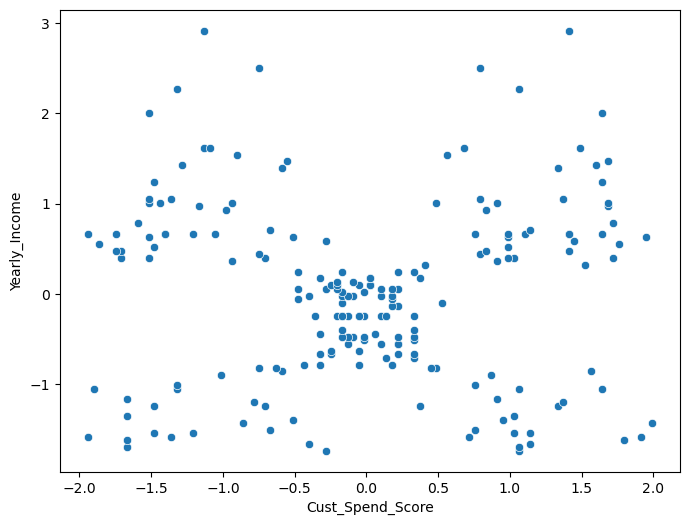

In [88]:
sns.scatterplot(x='Cust_Spend_Score',y='Yearly_Income',data=df_sf)
plt.show()

2. Pair Plot

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# initiate the algorithm
kmns=KMeans(n_clusters=5,random_state=10)
# fit the model
kmns.fit(df_sf)

# as per the procedure we do fit and then predict
# fit means we have build the model

In [ ]:
print(kmns.cluster_centers_)    # returns the co-ordinate cluster centrers they are coordinate of the centroid 

In [ ]:
print(kmns.labels_)   # label correspond to every row of the dataset labels are 0,1,2,3,4

In [89]:
print(kmns.inertia_)   # within sum of square 
print('no. of iterations',kmns.n_iter_)   # no. of iterations that were performed by algorithm to converge to the final solution
print('max no. of iterations',kmns.max_iter)  # the max inertia allowed default is 300
print('no. of cluster', kmns.n_clusters) # give the no. of clusters

66.69647392440946
no. of inertia 3
max no. of inertia 300
no. of cluster 5


In [140]:
# minimum no. of cluster = max no. of peaks
# max no. of cluster = product no. of peaks
# min no cluster = 3
# max no. of cluster = 

In [141]:
# 15.30 time

In [142]:
means_k= kmns.fit_predict(df_sf)     # 
means_k

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [84]:
df_sf.head()

,Yearly_Income,Cust_Spend_Score
0,-1.738999,-0.284181
1,-1.738999,1.063563
2,-1.700830,-1.670433
3,-1.700830,1.063563
4,-1.662660,-0.399702


In [85]:
df_final=df_sf.copy() # kmeans .fit_transform() sometimes modified the input data points 

In [86]:
df_final['group']=means_k

In [87]:
df_final['group']

0      3
1      4
2      3
3      4
4      3
      ..
195    0
196    2
197    0
198    2
199    0
Name: group, Length: 200, dtype: int32

In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Yearly_Income     200 non-null    float64
 1   Cust_Spend_Score  200 non-null    float64
 2   group             200 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 4.0 KB


<Figure size 1500x800 with 0 Axes>

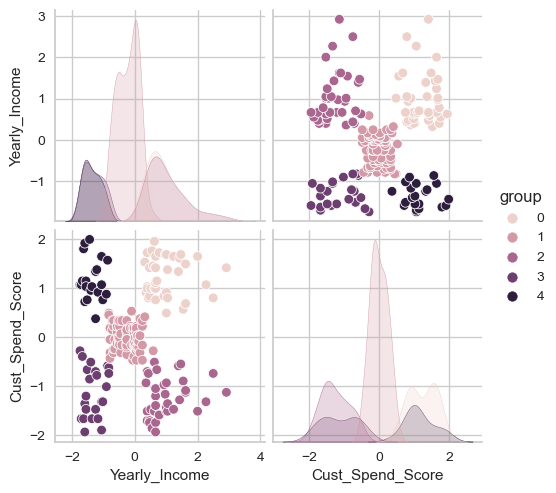

In [148]:
plt.figure(figsize=(15,8))
sns.pairplot(df_final,diag_kind='kde',hue='group')

<Figure size 1500x800 with 0 Axes>

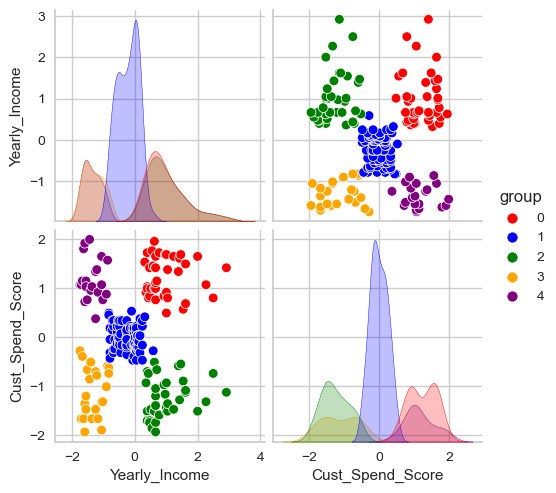

In [149]:
plt.figure(figsize=(15,8))
sns.pairplot(df_final,diag_kind='kde',hue='group',palette=['red','blue','green','orange','purple'])

3. Elbow plot

In [150]:
cluster_range=range(1,15)
wcss=[]
cluster_sil_score=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(df_sf)     # cluster or centroid form
    wcss.append(kmeans.inertia_)

C:\Users\jainh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [151]:
# lets check the wcss within sum cluster sum of square 
# the value keeps decreasing with increasing value k 

wcss

[400.0000000000001,
 270.04127364864394,
 158.5731864827108,
 110.00511756050398,
 66.69647392440946,
 56.0162322660558,
 45.50439585313613,
 38.523388827463506,
 33.637660108974856,
 30.057274204203104,
 26.940984974011688,
 24.964467751508053,
 22.258399918028708,
 20.738411804026693,
 18.636919945398272,
 17.445382357079442,
 16.173221372993243,
 14.663724441856512,
 13.558449765517508,
 12.470763642004268]

Text(0, 0.5, 'WCSS')

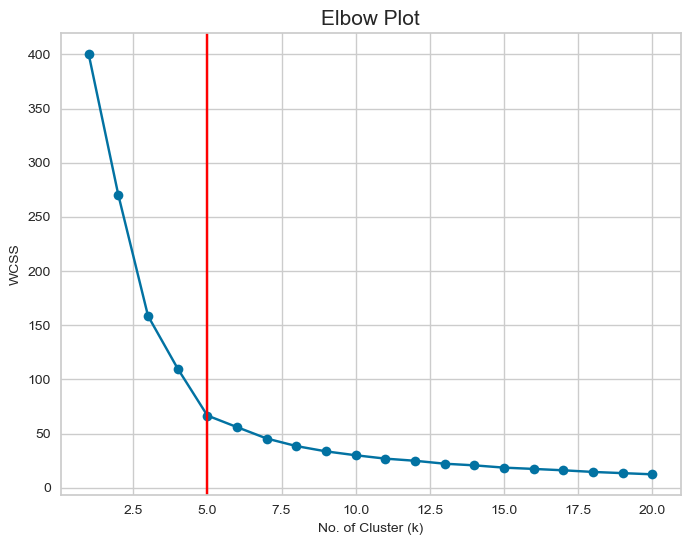

In [152]:
plt.plot(range(1,21),wcss,marker='o')
plt.axvline(x=5,color='red')
plt.title('Elbow Plot', fontsize=15)
plt.xlabel('No. of Cluster (k)', fontsize=10)
plt.ylabel('WCSS',fontsize=10)

4. SILHOUETTE SCORE

In [153]:
n_clusters= [2,3,4,5,6,7,8,9,10]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_sf)
    score=silhouette_score(df_sf,predict,random_state=10)
    print('for {} cluster the silhouette score is {})' .format(k,score))

for 2 cluster the silhouette score is 0.2843143329836938)
for 3 cluster the silhouette score is 0.4655232553320422)
for 4 cluster the silhouette score is 0.4953283597895246)
for 5 cluster the silhouette score is 0.5520621436364275)
for 6 cluster the silhouette score is 0.5400545310397922)
for 7 cluster the silhouette score is 0.5301955242744942)
for 8 cluster the silhouette score is 0.4443127733448644)
for 9 cluster the silhouette score is 0.4481528622255642)
for 10 cluster the silhouette score is 0.44182843794466764)


# DAY_2

4. Visualization of Silhouette Score

In [154]:
from sklearn.metrics import silhouette_score

In [155]:
! pip install yellowbrick

In [156]:
from yellowbrick.cluster import SilhouetteVisualizer

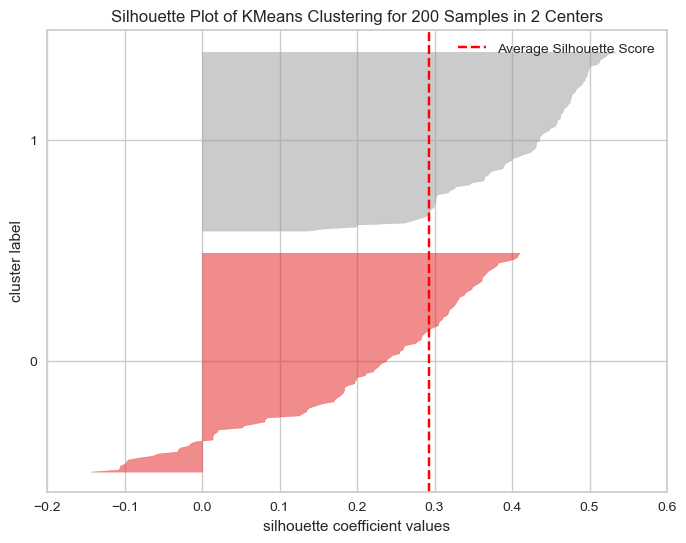

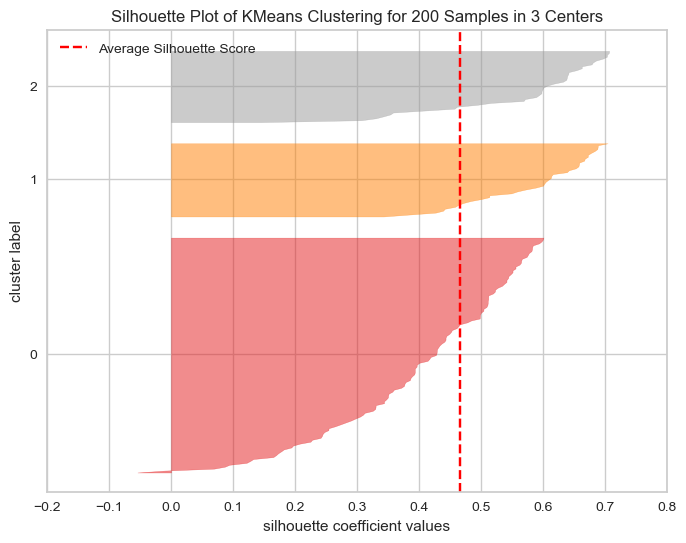

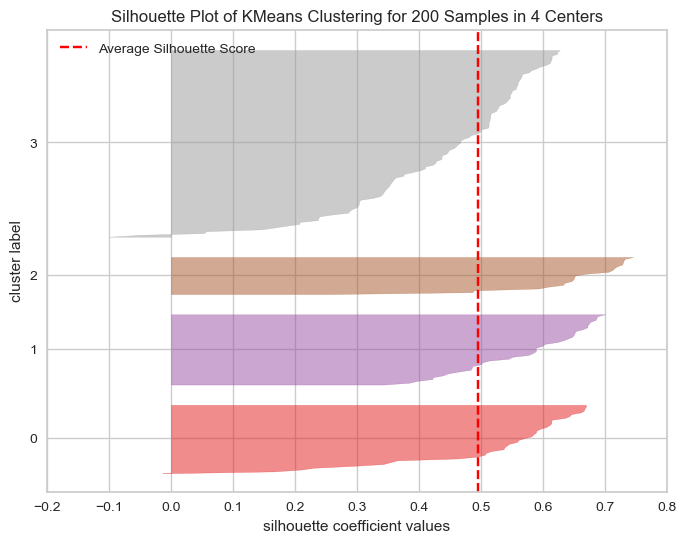

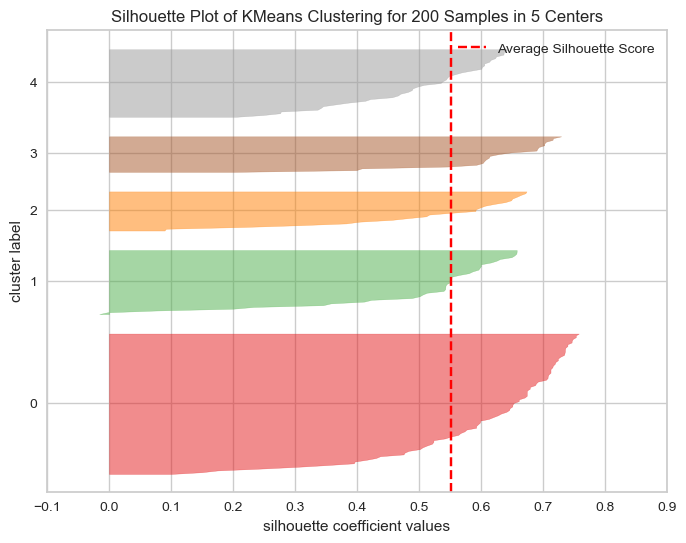

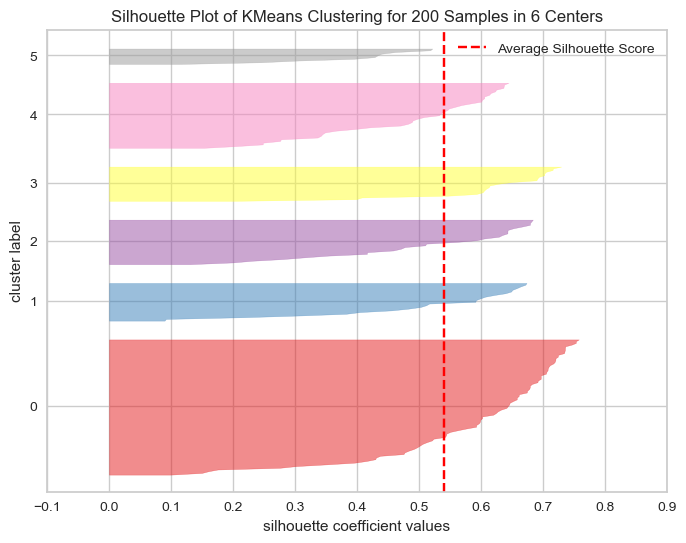

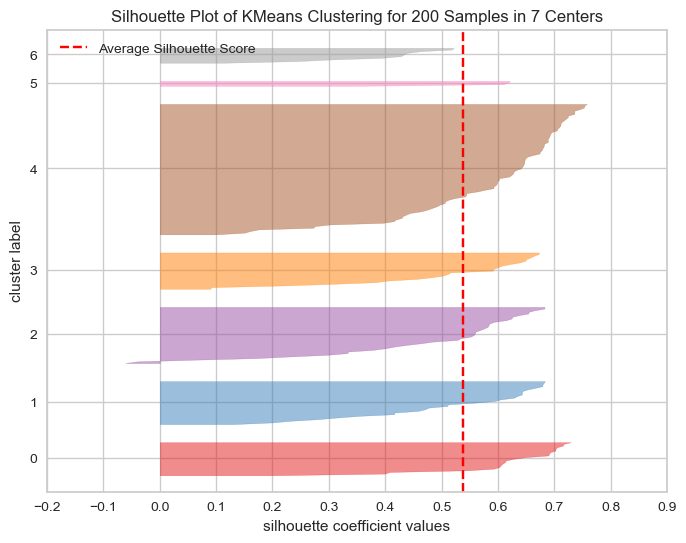

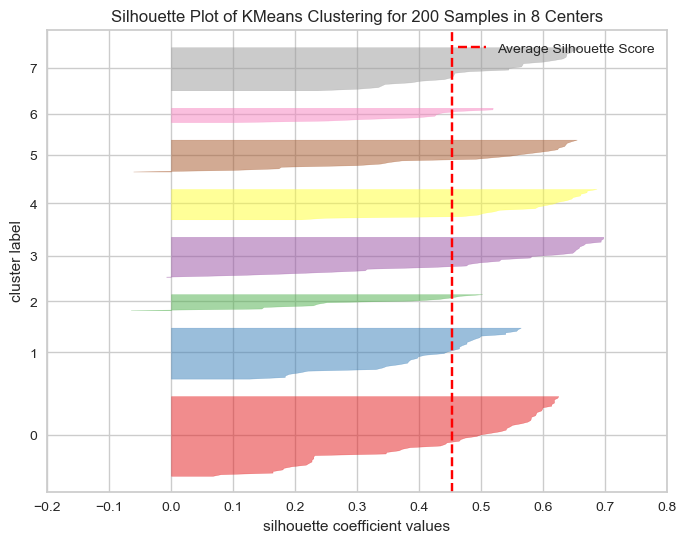

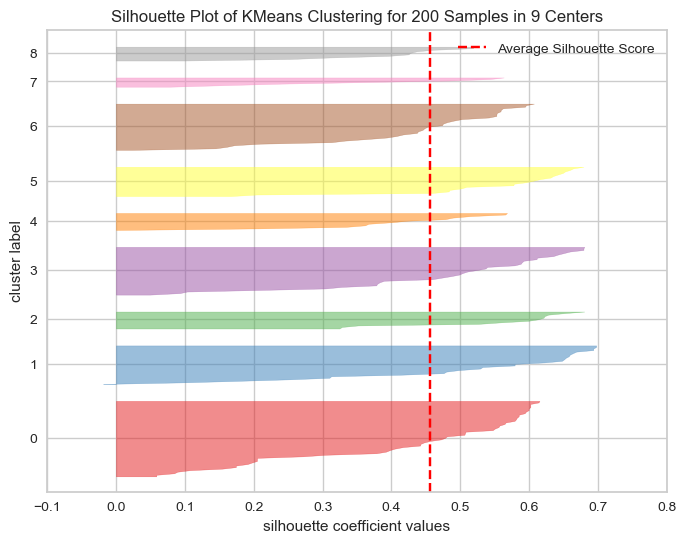

In [157]:
for i in range(2,10):
    kms=KMeans(n_clusters=i)
    kms.fit(df_sf)
    model= KMeans(n_clusters=i,random_state=42)
    visualizer= SilhouetteVisualizer(model)
    visualizer.fit(df_sf)
    visualizer.show()

5. Visual Analysis of the Clusters (Box Plot)

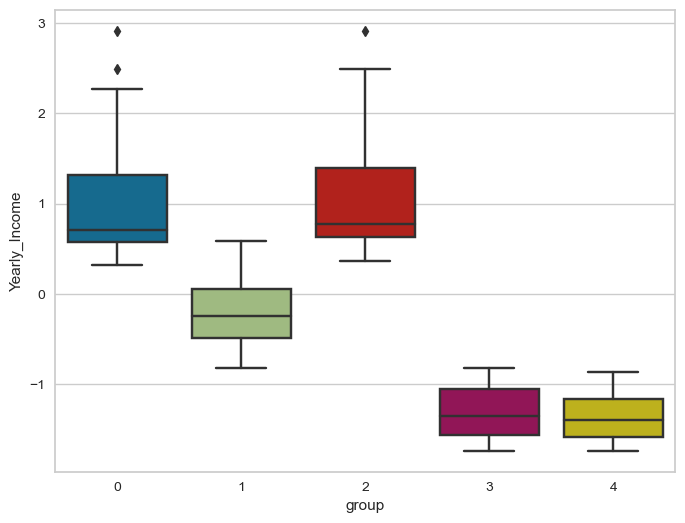

In [158]:
sns.boxplot(x='group',y='Yearly_Income',data=df_final)
plt.show()

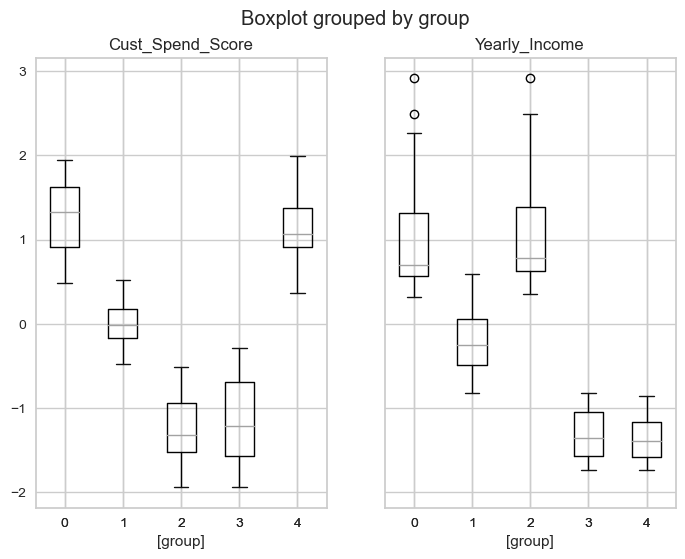

In [159]:
df_final.boxplot(by='group',layout=(1,2))
plt.show()

6.Buisness Analyst

In [160]:
df_CustSpend=df.copy()

In [161]:
df_CustSpend.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


In [162]:
df_CustSpend['Cluster']=df_final['group'].copy()
df_CustSpend.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
0,15000,18,44,0,3
1,15000,18,79,0,4
2,16000,23,8,1,3
3,16000,25,79,1,4
4,17000,32,41,1,3


In [163]:
# size of cluster 1
len(df_CustSpend[df_CustSpend['Cluster']==0])

39

In [164]:
df_CustSpend[df_CustSpend['Cluster']==0].describe()

,Yearly_Income,Age,Cust_Spend_Score,Sex,Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,86538.461538,32.589744,83.435897,0.538462,0.0
std,16312.484973,4.511494,10.176844,0.505035,0.0
min,69000.000000,26.000000,64.000000,0.000000,0.0
25%,75500.000000,28.500000,75.000000,0.000000,0.0
50%,79000.000000,33.000000,86.000000,1.000000,0.0
75%,95000.000000,36.000000,93.500000,1.000000,0.0
max,137000.000000,42.000000,102.000000,1.000000,0.0


In [165]:
# size of cluster 1 to 5
for i in range(5):
    print('Length of the cluster ',len(df_CustSpend[df_CustSpend['Cluster']==i]))
    print(df_CustSpend[df_CustSpend['Cluster']==i].describe())
    print('*'*80)
    

Length of the cluster  39
       Yearly_Income        Age  Cust_Spend_Score        Sex  Cluster
count      39.000000  39.000000         39.000000  39.000000     39.0
mean    86538.461538  32.589744         83.435897   0.538462      0.0
std     16312.484973   4.511494         10.176844   0.505035      0.0
min     69000.000000  26.000000         64.000000   0.000000      0.0
25%     75500.000000  28.500000         75.000000   0.000000      0.0
50%     79000.000000  33.000000         86.000000   1.000000      0.0
75%     95000.000000  36.000000         93.500000   1.000000      0.0
max    137000.000000  42.000000        102.000000   1.000000      0.0
********************************************************************************
Length of the cluster  80
       Yearly_Income        Age  Cust_Spend_Score        Sex  Cluster
count       80.00000  80.000000         80.000000  80.000000     80.0
mean     54687.50000  43.387500         51.200000   0.600000      1.0
std       8839.77454  16.59

# Hierarchical Clustering

In [166]:
# euclidean distane calculate 1st
# find the closet distance and cluster both 
# 

 build the model

In [167]:
from sklearn.cluster import AgglomerativeClustering

In [168]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [169]:
from scipy.spatial.distance import pdist    # pairwise distribution between data points

In [170]:
z= linkage(df_scale,'ward')

Linkage Method

In [171]:
# print the 10 observations of the linkage matrix 'link_mat'
print(z[0:10])

[[6.00000000e+01 6.10000000e+01 0.00000000e+00 2.00000000e+00]
 [7.50000000e+01 8.40000000e+01 0.00000000e+00 2.00000000e+00]
 [1.06000000e+02 1.10000000e+02 0.00000000e+00 2.00000000e+00]
 [1.11000000e+02 2.02000000e+02 0.00000000e+00 3.00000000e+00]
 [1.14000000e+02 1.15000000e+02 0.00000000e+00 2.00000000e+00]
 [7.80000000e+01 8.50000000e+01 0.00000000e+00 2.00000000e+00]
 [7.70000000e+01 8.30000000e+01 0.00000000e+00 2.00000000e+00]
 [1.50000000e+02 1.54000000e+02 0.00000000e+00 2.00000000e+00]
 [1.51000000e+02 1.55000000e+02 0.00000000e+00 2.00000000e+00]
 [3.40000000e+01 3.60000000e+01 3.81694292e-02 2.00000000e+00]]


Interpretation
1.  the values in the first two columns 60 and 61 are indices of the data that are clustered in pairs to form a new cluster 

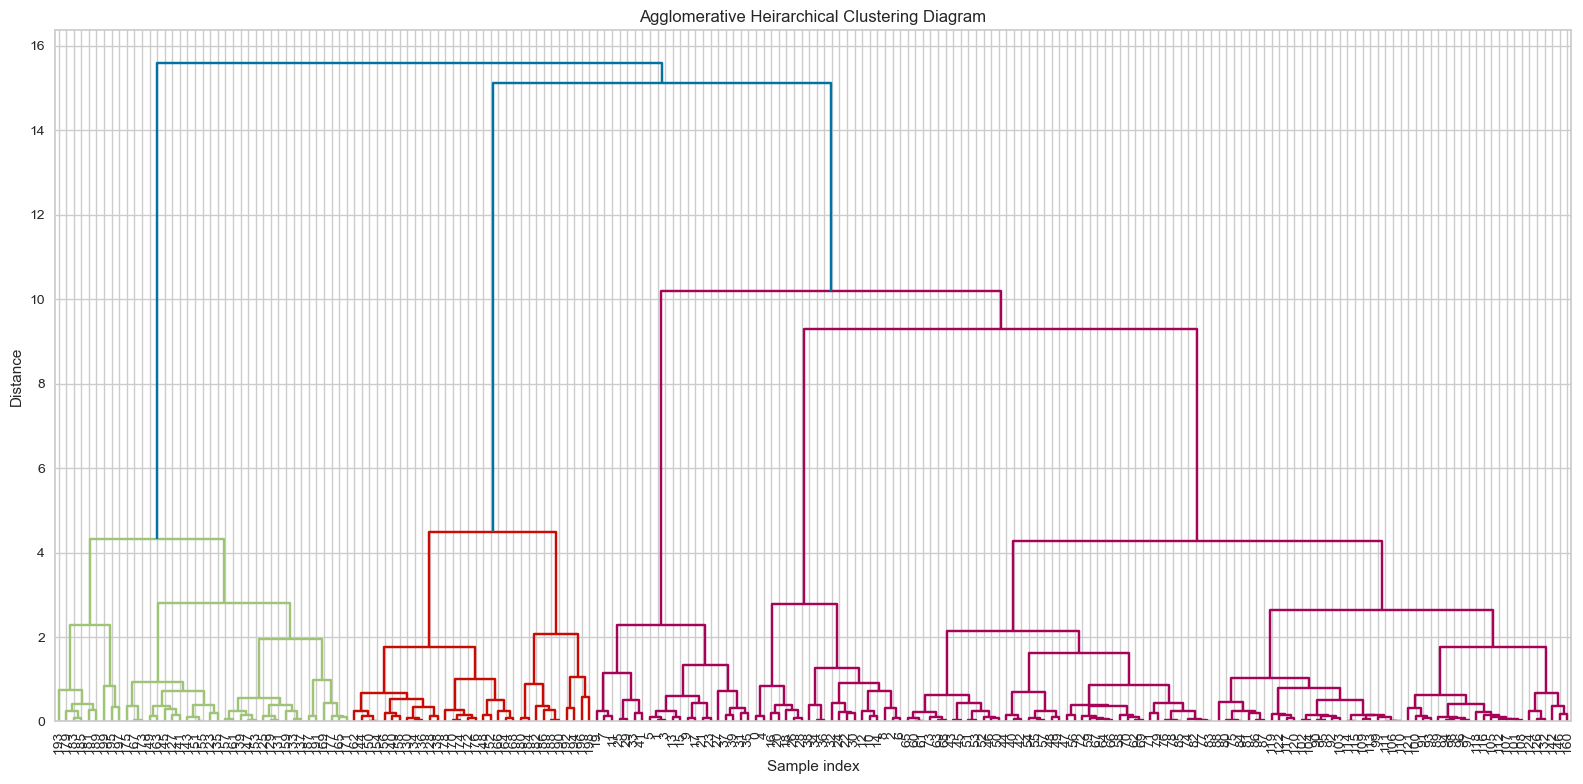

In [172]:
plt.figure(figsize=(16,8))
plt.title('Agglomerative Heirarchical Clustering Diagram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
z=linkage(df_scale,'ward')
dendrogram(z,leaf_rotation=90,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

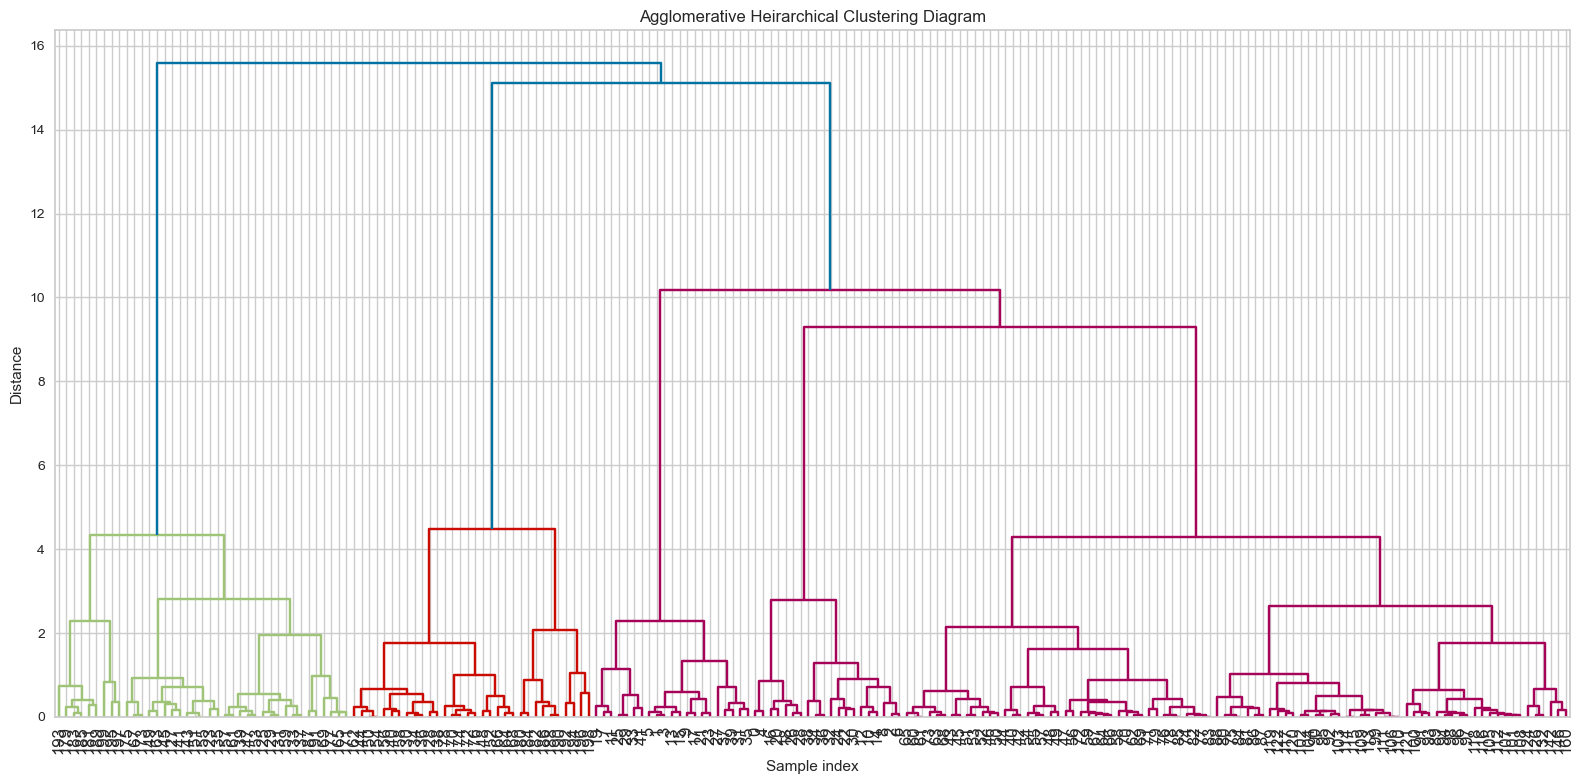

In [173]:
plt.figure(figsize=(16,8))
plt.title('Agglomerative Heirarchical Clustering Diagram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
z=linkage(df_scale,'ward')
dendrogram(z,leaf_rotation=90,p=25,color_threshold=12,leaf_font_size=12)
plt.tight_layout()

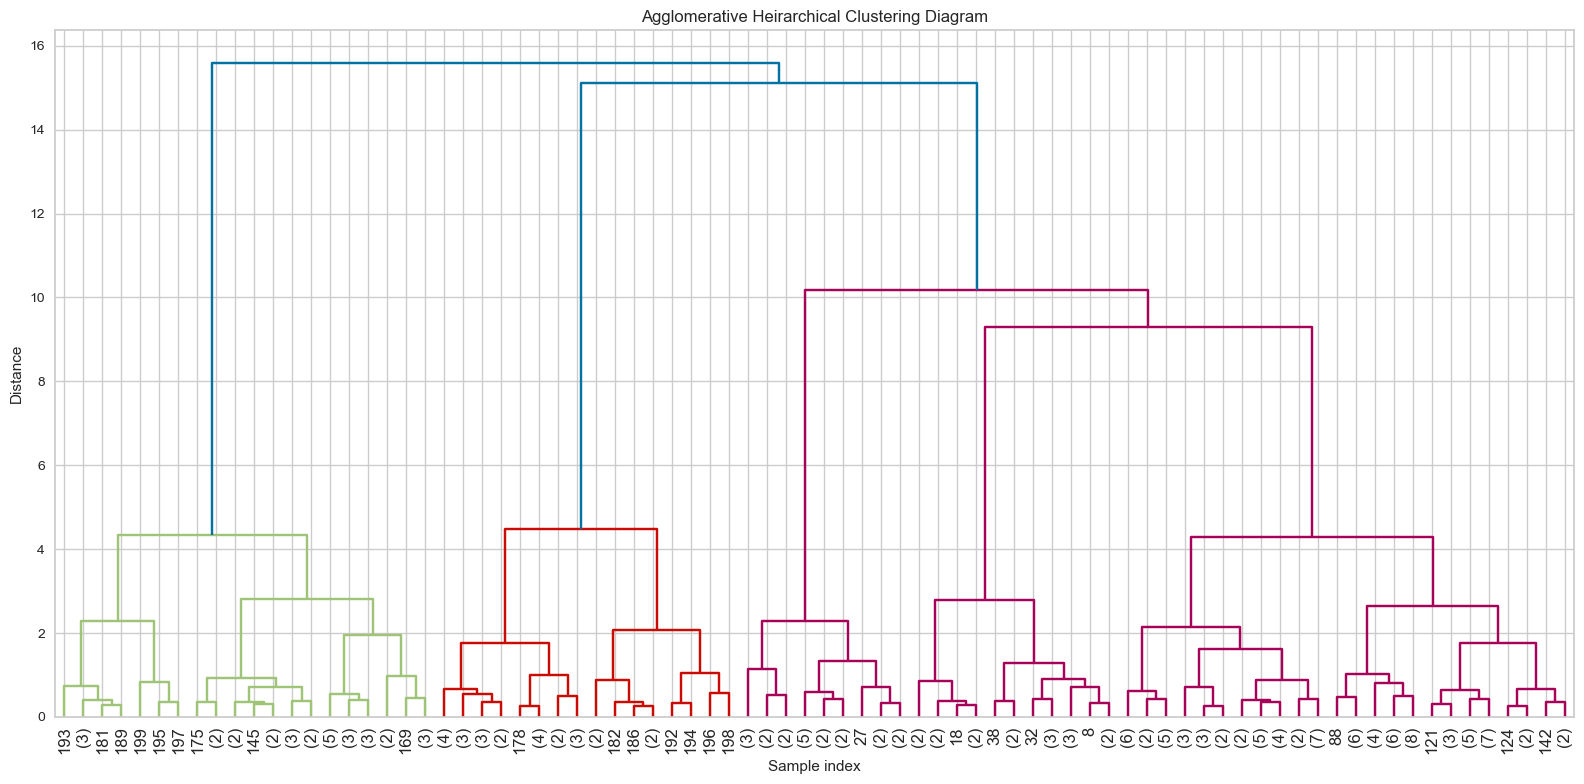

In [174]:
plt.figure(figsize=(16,8))
plt.title('Agglomerative Heirarchical Clustering Diagram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
z=linkage(df_scale,'ward')
dendrogram(z,leaf_rotation=90,p=80,color_threshold=12,leaf_font_size=12,truncate_mode='lastp')
plt.tight_layout()

Method 1 - Maxclust, 
Method 2 - Distance
--  the methods for extrancting the clusters 

In [175]:
from scipy.cluster.hierarchy import fcluster

In [176]:
cluster= fcluster(z,3,criterion='maxclust')
cluster

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Metod 2 - distance

In [177]:
cluster_dis= fcluster(z,8,criterion='distance')
cluster_dis

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 2, 1, 2, 1,
       5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [178]:
from sklearn.metrics.pairwise import euclidean_distances

In [179]:
eucli_dist= euclidean_distances(df_scale)
dist_array=eucli_dist[np.triu_indices(200,k=1)]
coeff, cophenet_dist=cophenet(z,dist_array)
print(coeff)

0.7180396352621479


In [180]:
dist_array

array([1.34774417, 1.38677653, 1.34828455, ..., 1.97059726, 0.74557298,
       2.54146043])

In [181]:
# the value of cophenetic coeff is 0.718 the value close to 1 indicates the best linkage quality here we can say that the linkage 
# quality is good 

In [182]:
from sklearn.metrics import silhouette_score

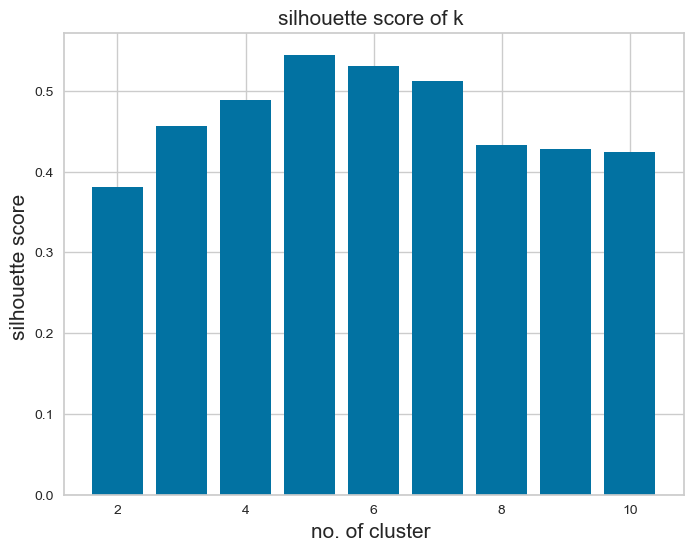

In [183]:
k=[2,3,4,5,6,7,8,9,10]
silhouette_scores=[]
for i in k:
    model=AgglomerativeClustering(n_clusters=i)
    silhouette_scores.append(silhouette_score(df_scale, model.fit_predict(df_scale)))
plt.bar(k,silhouette_scores)    
plt.title('silhouette score of k ', fontsize=15)
plt.xlabel('no. of cluster ', fontsize=15)
plt.ylabel('silhouette score ',fontsize=15)
plt.show()

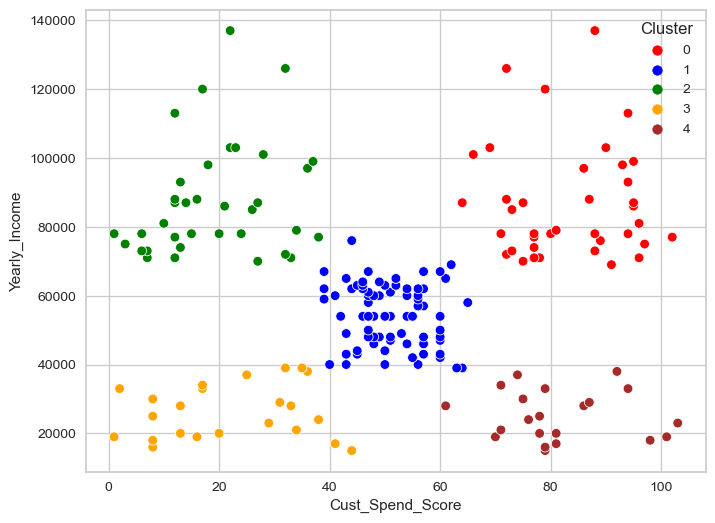

In [184]:
sns.scatterplot(data = df_CustSpend, x = 'Cust_Spend_Score' , y = 'Yearly_Income' , hue='Cluster', palette=['red', 'blue', 'green', 'orange','brown'])

plt.show()

# DAY 3

# DENSITY BASE CLUSTERING (DBSCAN)

In [185]:
# 2 PARAMETER ------  epsillon (radius / r) and no. of sample 